In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd


In [71]:
# #generated spectrum data are all in /Users/ctychen/Desktop/N3AS/spectrum_data
# #all files are .npy format

# #load data
# data = np.load('/Users/ctychen/Desktop/N3AS/spectrum_data/atm_retr_data_12800_0.npy')

# #ref: https://petitradtrans.readthedocs.io/en/latest/content/notebooks/emis_scat.html

# plt.figure(figsize=(10, 5))
# plt.plot(data[0], data[1])
# plt.xlabel('Wavelength (microns)')
# plt.ylabel(r'Flux (erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$)')
# plt.title('Atmosphere spectrum\nData: atm_retr_data_12800_0.npy')
# plt.show()

# plt.figure(figsize=(10, 5))
# plt.plot(data[0], data[1])
# plt.xlabel('Wavelength (microns)')
# plt.ylabel(r'Flux (erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$)')
# plt.title('Atmosphere spectrum [logscale x]\nData: atm_retr_data_12800_0.npy')
# plt.xscale('log')
# plt.show()

# plt.figure(figsize=(10, 5))
# plt.plot(data[0], data[1])
# plt.xlabel('Wavelength (microns)')
# plt.ylabel(r'Flux (erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$)')
# plt.title('Atmosphere spectrum [logscale y]\nData: atm_retr_data_12800_0.npy')
# plt.yscale('log')
# plt.show()



In [75]:
file_path = '/Users/ctychen/Desktop/N3AS/spectrum_data/'

parameters = np.concatenate([np.load(file_path + "atm_retr_params_12800_"+str(i)+".npy") for i in range(1)])
spectra_set = np.concatenate([np.load(file_path + "atm_retr_data_12800_"+str(i)+".npy") for i in range(1)])

parameters = parameters[~np.isnan(spectra_set).any(axis=1)]
spectra_set = spectra_set[~np.isnan(spectra_set).any(axis=1)]

print(parameters[0]) #these are the 16 params that were used for generating this spectrum

[ 9.23220256e-01  6.45568099e-01 -5.75129615e-01  8.59065464e-01
 -1.10761605e-01  7.45894113e+00  8.50069769e+00  2.78895735e+00
  5.37281966e+00  1.19847397e+00  1.88345008e+03  5.28894920e-01
  5.68044561e-01  9.25596638e-01  1.07103606e+00  8.71292997e-02]


In [76]:
print(spectra_set[0]) #this is an example of a spectrum

[1.38138736e-17 1.39077693e-17 1.40029617e-17 1.40997319e-17
 1.41947105e-17 1.42915257e-17 1.43890025e-17 1.44862680e-17
 1.45831429e-17 1.46791798e-17 1.47699320e-17 1.48776837e-17
 1.49799377e-17 1.50806845e-17 1.51813734e-17 1.52841496e-17
 1.53861472e-17 1.54877515e-17 1.55915019e-17 1.56944789e-17
 1.57980392e-17 1.59031399e-17 1.60079009e-17 1.61099885e-17
 1.62032947e-17 1.63104712e-17 1.64156139e-17 1.65251573e-17
 1.66333404e-17 1.67423417e-17 1.68526813e-17 1.69629980e-17
 1.70672791e-17 1.71757155e-17 1.72837781e-17 1.73959060e-17
 1.75095853e-17 1.76236660e-17 1.77381903e-17 1.78530364e-17
 1.79679332e-17 1.80767687e-17 1.81922574e-17 1.83056820e-17
 1.84231204e-17 1.85405311e-17 1.86586077e-17 1.87715155e-17
 1.88965209e-17 1.90174635e-17 1.91329125e-17 1.92539111e-17
 1.93733198e-17 1.94951395e-17 1.96157275e-17 1.97389196e-17
 1.98630327e-17 1.99868362e-17 2.01122559e-17 2.02326421e-17
 2.03591442e-17 2.04836548e-17 2.06113723e-17 2.07388201e-17
 2.08677248e-17 2.099387

In [77]:
print(spectra_set.shape)
print(parameters.shape)
# (12800, 947) means that we have 12800 different spectra
# Each one with 947 data points (one for each different wavelength)

(12800, 947)
(12800, 16)


In [74]:
#so each data file contains 12800 individual spectra
#plt.plot(data[0,:]) will plot the first spectrum
#plt.plot(data[1,:]) the second, and so on
#we can treat each of these spectra like its own observation that we are making 
#the id is just the value of the random seed that we used in generating this set of spectra

In [85]:
#from the 12800 spectra, plot some random ones
for i in range(5): 
    print(spectra_set[i,:].shape)
    # plt.figure(figsize=(10, 5))
    # plt.plot(spectra_set[i, :])

    # plt.xlabel('Wavelength (microns)')
    # plt.ylabel(r'Flux (erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$)')
    # plt.title(f'Atmosphere spectrum\nSpectrum num: {i} from atm_retr_data_12800_0.npy')
    # plt.xscale('log')
    # plt.grid(linestyle='--', linewidth=0.5)
    # plt.show()

(947,)
(947,)
(947,)
(947,)
(947,)


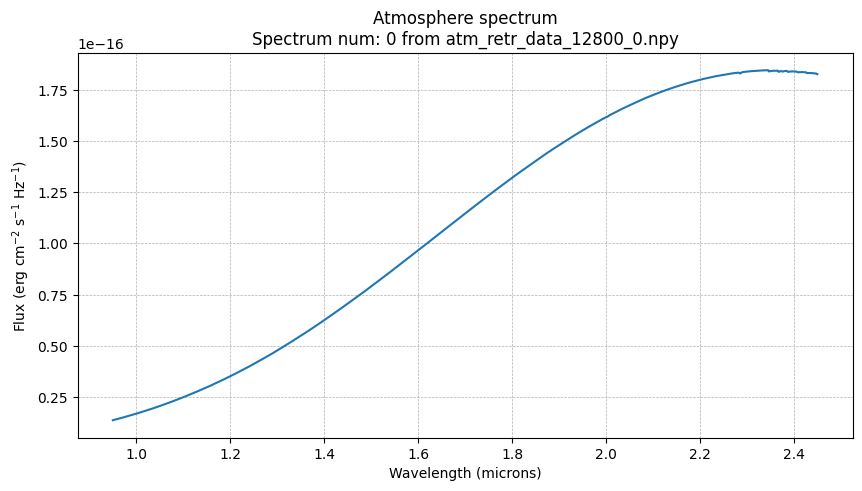

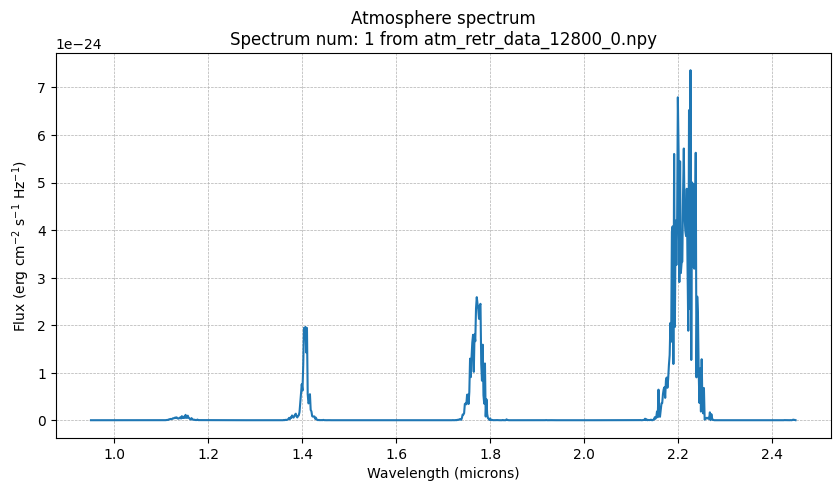

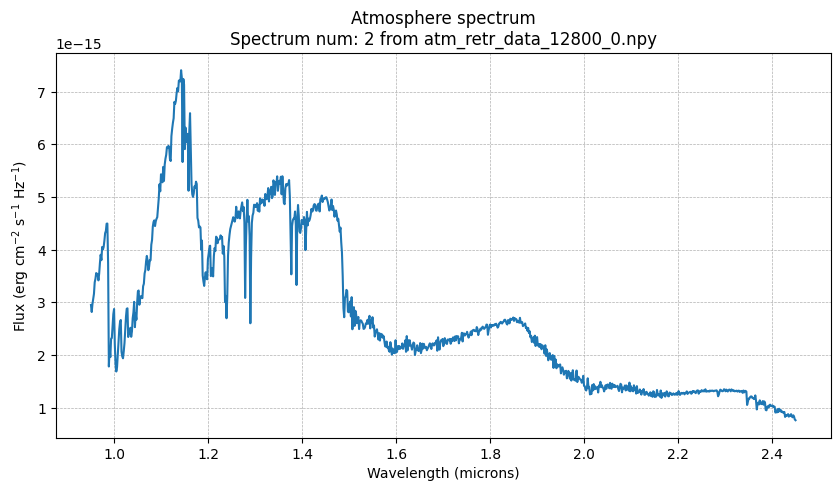

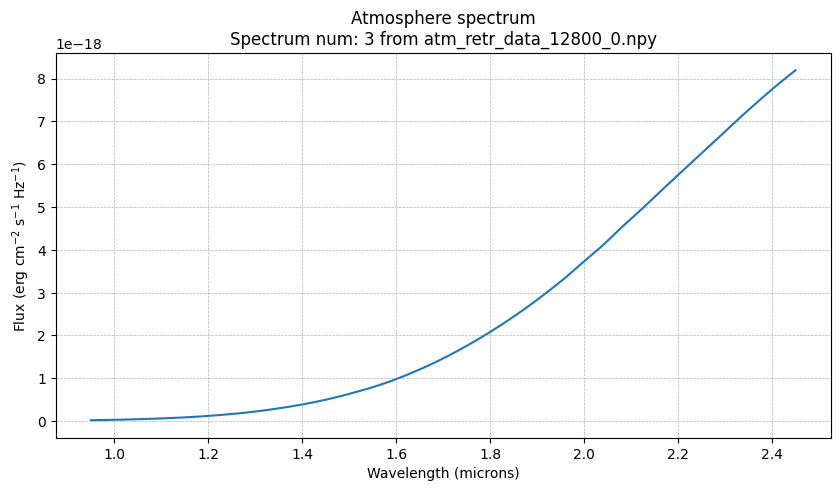

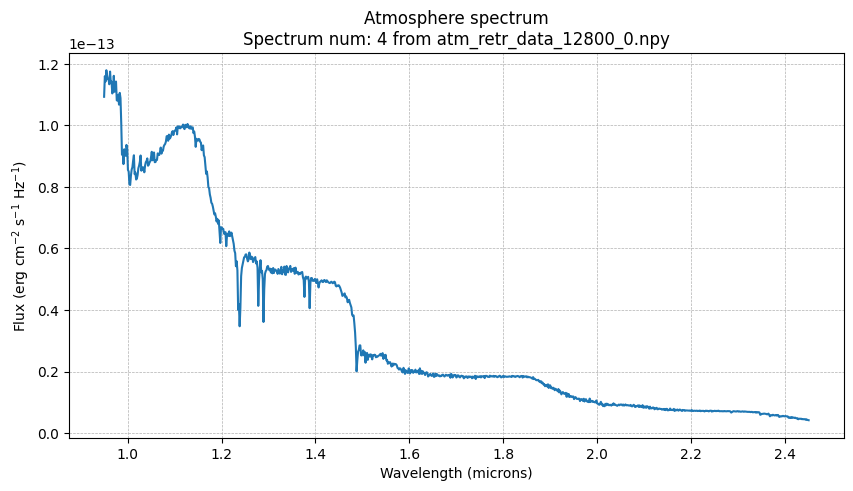

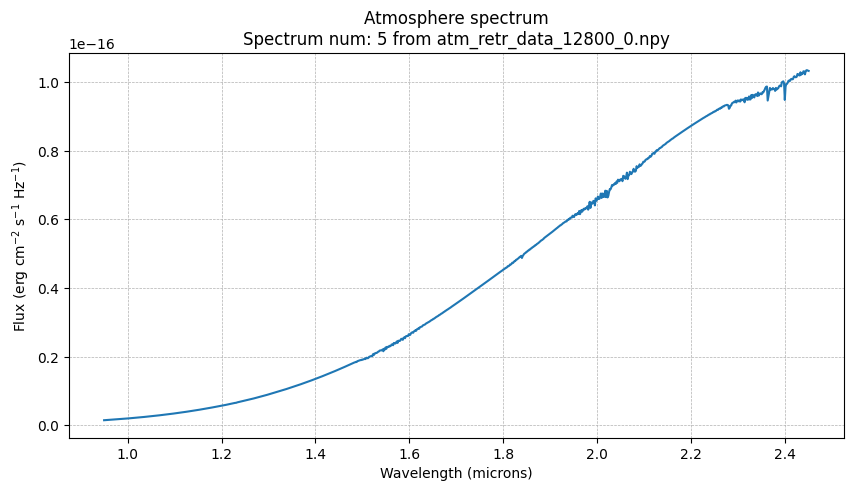

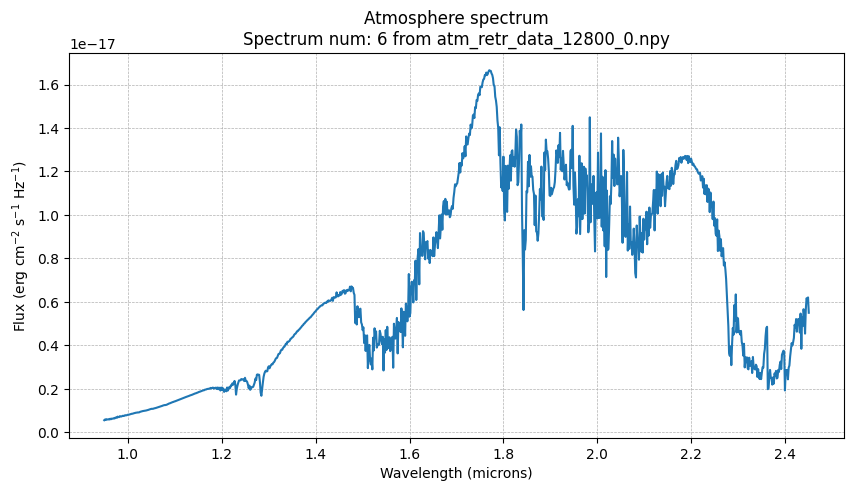

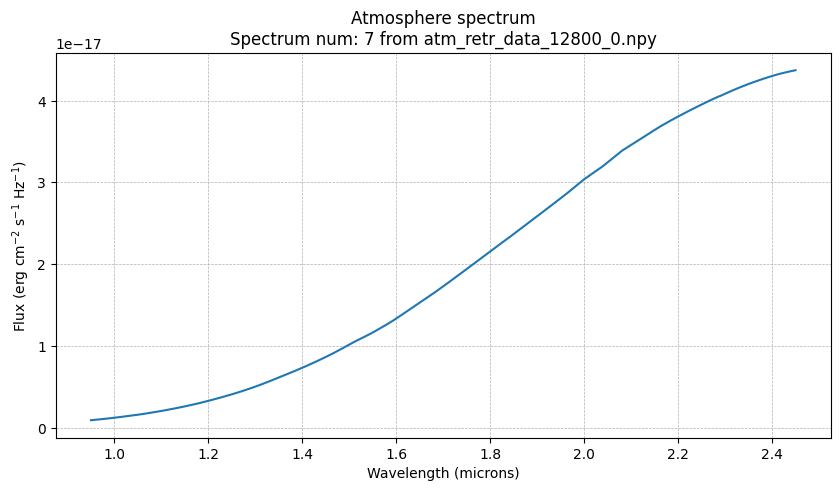

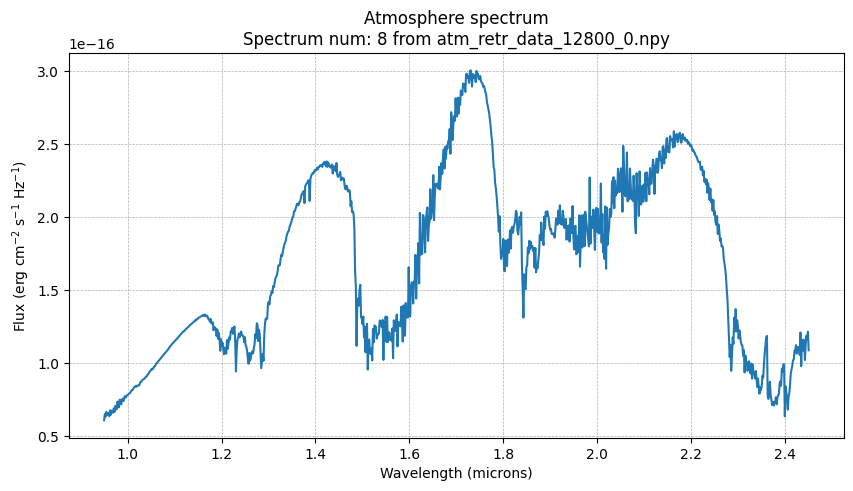

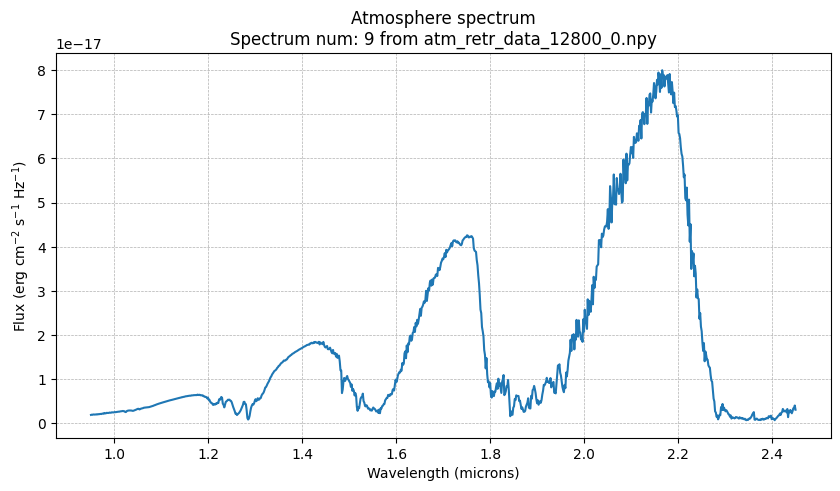

In [90]:
#from the 12800 spectra, plot some random ones
for i in range(10): 
    spectrum = spectra_set[i, :]
    wavelengths = np.linspace(0.95, 2.45, len(spectrum)) #[0.95, 2.45]
    plt.figure(figsize=(10, 5))
    plt.plot(wavelengths, spectrum)
    plt.xlabel('Wavelength (microns)')
    plt.ylabel(r'Flux (erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$)')
    plt.title(f'Atmosphere spectrum\nSpectrum num: {i} from atm_retr_data_12800_0.npy')
    # plt.xscale('log')
    plt.grid(linestyle='--', linewidth=0.5)
    plt.show()

In [ ]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])

fig = plt.figure(figsize=(20, 8))
ax = plt.subplot(gs[0])

# Assigning the second column to the empty plot (table)
ax_table = plt.subplot(gs[1])
ax_table.text(0.05, 0.94, 'Reduced $\chi^2={:.3}$'.format(reducedχ2_1419_905), size=18)
ax_table.text(0.05, 0.72, 'Tall Gaussian Fit\nParameters:', size=18)
ax_table.text(0.05,0.53, "Amp$= {:.5} \pm {:.3}$ K\n$\mu = {:.5} \pm {:.3}$ km/s\n$\sigma =  {:.5} \pm {:.3}$ km/s".format(tallgaussian_opt['amp'][0], tallgaussian_err[0], tallgaussian_opt['avg'][0], tallgaussian_err[1], tallgaussian_opt['sig'][0], tallgaussian_err[2]), size=18)
ax_table.text(0.05, 0.31, 'Short Gaussian Fit\nParameters:', size=18)
ax_table.text(0.05, 0.12, "Amp$= {:.4} \pm {:0.3}$ K\n$\mu = {:.5} \pm {:.4}$ km/s\n$\sigma =  {:.4} \pm {:.4}$ km/s".format(shortgaussian_opt['amp'][0], shortgaussian_err[0], shortgaussian_opt['avg'][0], shortgaussian_err[1], shortgaussian_opt['sig'][0], shortgaussian_err[2]), size=18)

ax_table.set_axis_off() 
plt.tight_layout(pad=2.0)
plt.show()
